# Lab6

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

Więcej na https://github.com/JuliaMath/Roots.jl/blob/master/doc/roots.ipynb

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

1.Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b> Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b>


In [1]:
using Roots  
using Plots
using ForwardDiff

In [2]:
f1(x) = sin(x) - x/2 
f2(x) = 2 * x - exp(-x)
f3(x) = x * exp(-x)
f4(x) = x^3
f5(x) = cos(x) - x
f6(x) = exp(x)-2-1/(10*x)^2+2/(100*x)^3

f6 (generic function with 1 method)

In [3]:
Fun = []
Type = []
Iter = Int[]
Eval = Int[]
Success = []

for i in 1:3
    push!(Fun, "f1")
    push!(Fun, "f2")
    push!(Fun, "f3")
    push!(Fun, "f4")
    push!(Fun, "f5")
    push!(Fun, "f6")
end
for i in 1:6
    push!(Type, "False pos")
end
for i in 1:6
    push!(Type, "Newton")
end
for i in 1:6
    push!(Type, "Secant")
end

Iter = [9, 7, 41, 19, 8, 8, 0, 4, 0, 0, 5, -1, 0, 5, 0, 0, 7, -1]
Eval = [11, 9, 43, 21, 10, 10, 1, 9, 1, 1, 11, -1, 2, 7, 2, 2, 9, -1]
Success = ["T", "T", "F", "F", "T", "F", "T", "T", "T", "T", "T", "-", "T", "F", "T", "T", "T", "-"]


18-element Array{String,1}:
 "T"
 "T"
 "F"
 "F"
 "T"
 "F"
 "T"
 "T"
 "T"
 "T"
 "T"
 "-"
 "T"
 "F"
 "T"
 "T"
 "T"
 "-"

In [4]:
using DataFrames

data = DataFrame()
data[:Function] = Fun
data[:Type] = Type
data[:Iterations] = Iter
data[:Evaluations] = Eval
data[:Success] = Success
data

,Function,Type,Iterations,Evaluations,Success
,Any,Any,Int64,Int64,String
1,f1,False pos,9,11,T
2,f2,False pos,7,9,T
3,f3,False pos,41,43,F
4,f4,False pos,19,21,F
5,f5,False pos,8,10,T
6,f6,False pos,8,10,F
7,f1,Newton,0,1,T
8,f2,Newton,4,9,T
9,f3,Newton,0,1,T


<b> Metoda wykorzystująca przedział i zmianę znaku

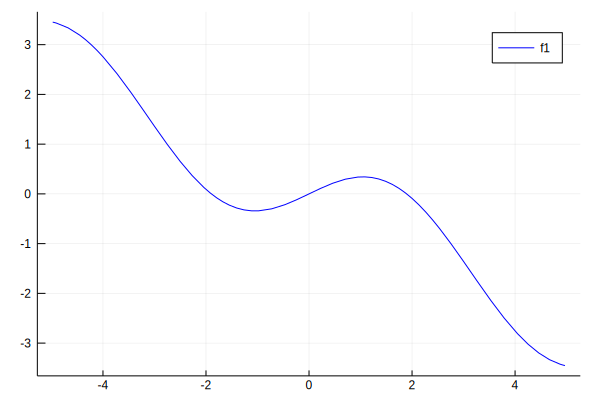

In [5]:
f1(x) = sin(x) - x/2 
plot(f1, -5, 5, label = "f1", color = "blue")

In [6]:
x1 = find_zero(f1, (-5, 5), FalsePosition(), verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 9
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 2.5000000000000000,  1.2500000000000000)
(a_3, b_3) = ( 2.5000000000000000,  1.6651466890159652)
(a_4, b_4) = ( 1.6651466890159652,  1.9446763851217526)
(a_5, b_5) = ( 1.9446763851217526,  1.8880306380481127)
(a_6, b_6) = ( 1.9446763851217526,  1.8952878661159387)
(a_7, b_7) = ( 1.8952878661159387,  1.8954942966408586)
(a_8, b_8) = ( 1.8954942966408586,  1.8954942670304449)
(a_9, b_9) = ( 1.8954942966408586,  1.8954942670339809)



true

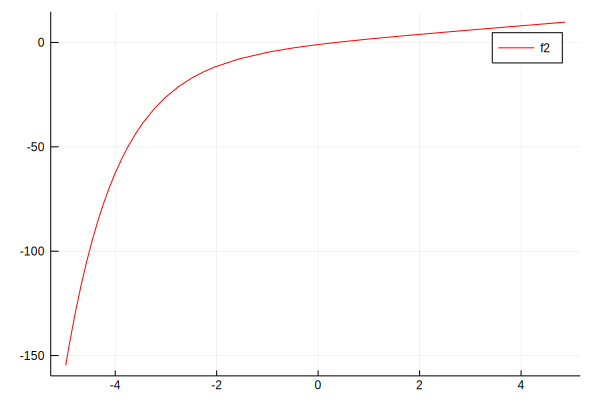

In [7]:
f2(x) = 2 * x - exp(-x)
plot(f2, -5, 5, label = "f2", color = "red")

In [8]:
x2 = find_zero(f2, (-5, 5), FalsePosition(), verbose=true)
iszero(f2(x2))

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 2.5000000000000000,  0.2307160595325901)
(a_3, b_3) = ( 0.2307160595325901,  0.3744392757046812)
(a_4, b_4) = ( 0.2307160595325901,  0.3520984362668378)
(a_5, b_5) = ( 0.2307160595325901,  0.3517337379126361)
(a_6, b_6) = ( 0.3517337379126361,  0.3517337112479366)
(a_7, b_7) = ( 0.3517337379126361,  0.3517337112491958)



true

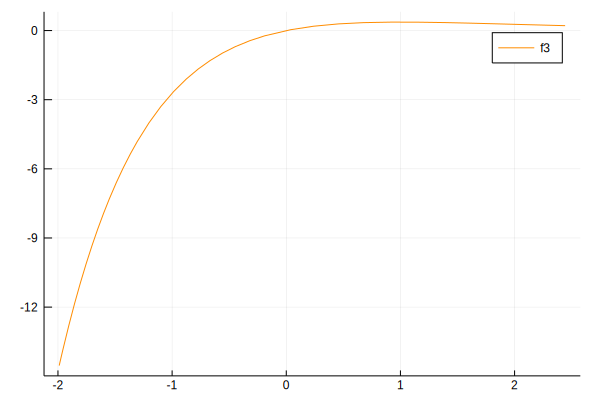

In [9]:
f3(x) =  x * exp(-x)
plot(f3, -2, 2.5, label = "f3", color = "dark orange")

In [10]:
x3 = find_zero(f3, (-5, 5), FalsePosition(), verbose=true)
iszero(f3(x3))

Results of univariate zero finding:

* Converged to: 2.2737367544323206e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 41
* function evaluations: 43
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.2500000000000000)
(a_3, b_3) = ( 0.0000000000000000,  0.6250000000000000)
(a_4, b_4) = ( 0.0000000000000000,  0.3125000000000000)
(a_5, b_5) = ( 0.0000000000000000,  0.1562500000000000)
(a_6, b_6) = ( 0.0000000000000000,  0.0781250000000000)
(a_7, b_7) = ( 0.0000000000000000,  0.0390625000000000)
(a_8, b_8) = ( 0.0000000000000000,  0.0195312500000000)
(a_9, b_9) = ( 0.0000000000000000,  0.0097656250000000)
(a_10, b_10) = ( 0.0000000000000000,  0.0048828125000000)
(a_11, b_11) = ( 0.0000000000000000,  0.0024414062500000)
(a_12, b_12) = ( 0.00000000000

false

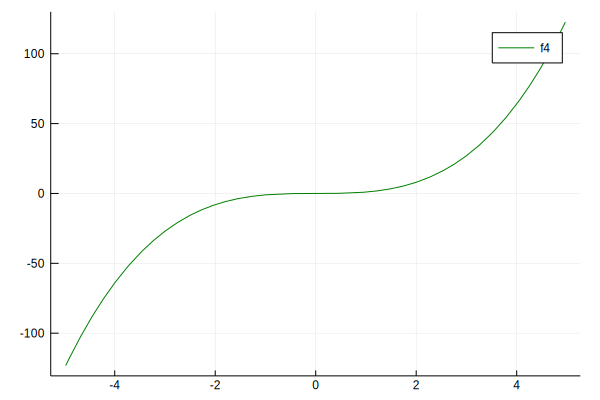

In [11]:
f4(x) = x^3
plot(f4, -5, 5, label = "f4", color = "green")

In [12]:
x4 = find_zero(f4, (-5, 5), FalsePosition(), verbose=true)
iszero(f4(x4))

Results of univariate zero finding:

* Converged to: 9.5367431640625e-6
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 19
* function evaluations: 21
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.2500000000000000)
(a_3, b_3) = ( 0.0000000000000000,  0.6250000000000000)
(a_4, b_4) = ( 0.0000000000000000,  0.3125000000000000)
(a_5, b_5) = ( 0.0000000000000000,  0.1562500000000000)
(a_6, b_6) = ( 0.0000000000000000,  0.0781250000000000)
(a_7, b_7) = ( 0.0000000000000000,  0.0390625000000000)
(a_8, b_8) = ( 0.0000000000000000,  0.0195312500000000)
(a_9, b_9) = ( 0.0000000000000000,  0.0097656250000000)
(a_10, b_10) = ( 0.0000000000000000,  0.0048828125000000)
(a_11, b_11) = ( 0.0000000000000000,  0.0024414062500000)
(a_12, b_12) = ( 0.0000000000000000,  0.0012207031250000)
(a_13, b_13) = ( 0.0000000

false

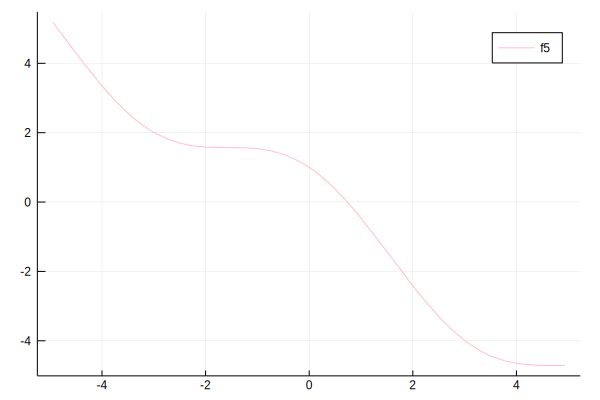

In [13]:
f5(x) = cos(x) - x
plot(f5, -5, 5, label = "f5", color = "pink")

In [14]:
x5 = find_zero(f5, (-5, 5), FalsePosition(), verbose=true)
iszero(f5(x5))

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 8
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 2.5000000000000000,  0.3288484010147408)
(a_3, b_3) = ( 2.5000000000000000,  0.6710095772322766)
(a_4, b_4) = ( 0.6710095772322766,  0.7439342330874568)
(a_5, b_5) = ( 0.7439342330874568,  0.7390097975349801)
(a_6, b_6) = ( 0.7439342330874568,  0.7390850527545149)
(a_7, b_7) = ( 0.7390850527545149,  0.7390851332151640)
(a_8, b_8) = ( 0.7390850527545149,  0.7390851332151607)



true

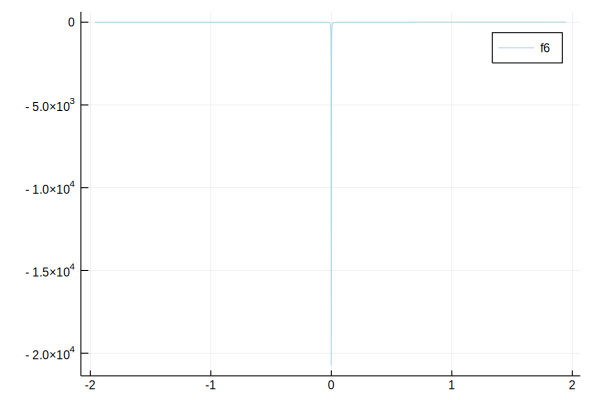

In [15]:
f6(x) = exp(x)-2-1/(10*x)^2+2/(100*x)^3
plot(f6, -2, 2, label = "f6", color = "light blue")

In [16]:
x6 = find_zero(f6, (-5, 5), FalsePosition(), verbose=true)
iszero(f6(x6))

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 8
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.2500000000000000)
(a_3, b_3) = ( 1.2500000000000000,  0.6250000000000000)
(a_4, b_4) = ( 1.2500000000000000,  0.6849169961854040)
(a_5, b_5) = ( 1.2500000000000000,  0.7031884111107530)
(a_6, b_6) = ( 0.7031884111107530,  0.7032049676656591)
(a_7, b_7) = ( 0.7032049676656591,  0.7032048403622425)
(a_8, b_8) = ( 0.7032048403622425,  0.7032048403631358)



false

<b> Metoda wykorzystująca pochodną

In [17]:
# definujemy D(f) obliczającą  funkcje pochodną 
D1(f1) = x->ForwardDiff.derivative(f1, float(x))
plot(D1(f1), -5, 5, label = "D1", color = "blue")

x1 = find_zero((f1, D1(f1)), 0, Roots.Newton(), verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 0
* function evaluations: 1
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [18]:
DD1(f1) = x->ForwardDiff.derivative(D1(f1), float(x))
plot(DD1(f1), -5, 5, label = "DD1", color = "blue")

x1 = find_zero((f1, D1(f1), DD1(f1)), 0.0, Roots.Halley(), verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Halley()
* iterations: 0
* function evaluations: 3
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [19]:
D2(f2) = x->ForwardDiff.derivative(f2, float(x))
plot(D2(f2), -5, 5, label = "D2", color = "blue")

x2 = find_zero((f2, D2(f2)), 0, Roots.Newton(), verbose=true)
iszero(f2(x2))

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.3333333333333333,	 fx_1 = -0.0498646439071226
x_2 =  0.3516893315554154,	 fx_2 = -0.0001199797491258
x_3 =  0.3517337109929426,	 fx_3 = -0.0000000006927722
x_4 =  0.3517337112491958,	 fx_4 =  0.0000000000000000



true

In [20]:
D3(f3) = x->ForwardDiff.derivative(f3, float(x))
plot(D3(f3), -5, 5, label = "D3", color = "blue")

x3 = find_zero((f3, D3(f3)), 0, Roots.Newton(), verbose=true)
iszero(f3(x3))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 0
* function evaluations: 1
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [21]:
D4(f4) = x->ForwardDiff.derivative(f4, float(x))
plot(D4(f4), -5, 5, label = "D4", color = "blue")

x4 = find_zero((f4, D4(f4)), 0, Roots.Newton(), verbose=true)
iszero(f4(x4))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 0
* function evaluations: 1
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [22]:
D5(f5) = x->ForwardDiff.derivative(f5, float(x))
plot(D5(f5), -5, 5, label = "D5", color = "blue")

x5 = find_zero((f5, D5(f5)), 0, Roots.Newton(), verbose=true)
iszero(f5(x5))

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  1.0000000000000000,	 fx_1 = -0.4596976941318602
x_2 =  0.7503638678402439,	 fx_2 = -0.0189230738221174
x_3 =  0.7391128909113617,	 fx_3 = -0.0000464558989908
x_4 =  0.7390851333852840,	 fx_4 = -0.0000000002847206
x_5 =  0.7390851332151607,	 fx_5 =  0.0000000000000000



true

In [23]:
D6(f6) = x->ForwardDiff.derivative(f6, float(x))
plot(D6(f6), -5, 5, label = "D6", color = "blue")

x6 = find_zero((f6, D6(f6)), 0, Roots.Newton(), verbose=true)
iszero(f6(x6))

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Newton()

Trace:
x_0 =  0.0000000000000000,	 fx_0 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.0")

<b> Metoda wykorzystująca przybliżenie pochodnej

In [24]:
x1 = find_zero(f1, 0, Order1(),  verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Secant()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [25]:
x2 = find_zero(f2, 0, Order1(),  verbose=true)
iszero(f2(x2))

Results of univariate zero finding:

* Converged to: 0.3517337112491957
* Algorithm: Roots.Secant()
* iterations: 5
* function evaluations: 7
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.3333336697473491,	 fx_1 = -0.0498637300279561
x_2 =  0.3508272237172430,	 fx_2 = -0.0024509486253887
x_3 =  0.3517315326564641,	 fx_3 = -0.0000058897561466
x_4 =  0.3517337109922089,	 fx_4 = -0.0000000006947557
x_5 =  0.3517337112491957,	 fx_5 = -0.0000000000000002



false

In [26]:
x3 = find_zero(f3, 0, Order1(),  verbose=true)
iszero(f3(x3))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Secant()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [27]:
x4 = find_zero(f4, 0, Order1(),  verbose=true)
iszero(f4(x4))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Secant()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [28]:
x5 = find_zero(f5, 0, Order1(),  verbose=true)
iszero(f5(x5))

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835395,	 fx_1 = -0.4596921186823245
x_2 =  0.6850738998209051,	 fx_2 =  0.0892983907342114
x_3 =  0.7362990541607765,	 fx_3 =  0.0046599445167861
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851121285389,	 fx_5 =  0.0000000352908237
x_6 =  0.7390851332150014,	 fx_6 =  0.0000000000002666
x_7 =  0.7390851332151607,	 fx_7 =  0.0000000000000000



true

In [29]:
x6 = find_zero(f6, 0, Order1(),  verbose=true)
iszero(f6(x6))

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Secant()

Trace:
x_0 =  0.0000000000000000,	 fx_0 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.0")

<b> 2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej.

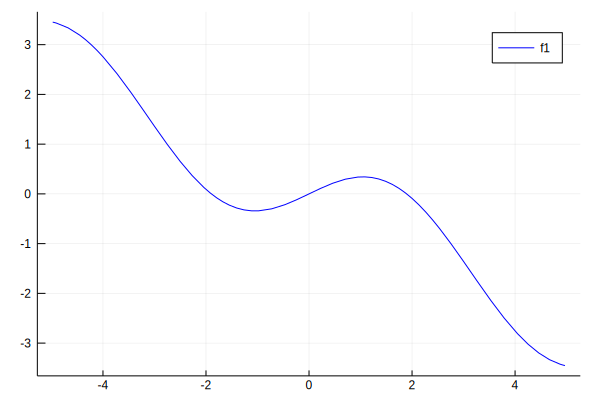

In [35]:
f1(x) = sin(x) - x/2 
plot(f1, -5, 5, label = "f1", color = "blue")

In [44]:
x1 = find_zero(f1, (-5, 5), FalsePosition(), verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 9
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 2.5000000000000000,  1.2500000000000000)
(a_3, b_3) = ( 2.5000000000000000,  1.6651466890159652)
(a_4, b_4) = ( 1.6651466890159652,  1.9446763851217526)
(a_5, b_5) = ( 1.9446763851217526,  1.8880306380481127)
(a_6, b_6) = ( 1.9446763851217526,  1.8952878661159387)
(a_7, b_7) = ( 1.8952878661159387,  1.8954942966408586)
(a_8, b_8) = ( 1.8954942966408586,  1.8954942670304449)
(a_9, b_9) = ( 1.8954942966408586,  1.8954942670339809)



true

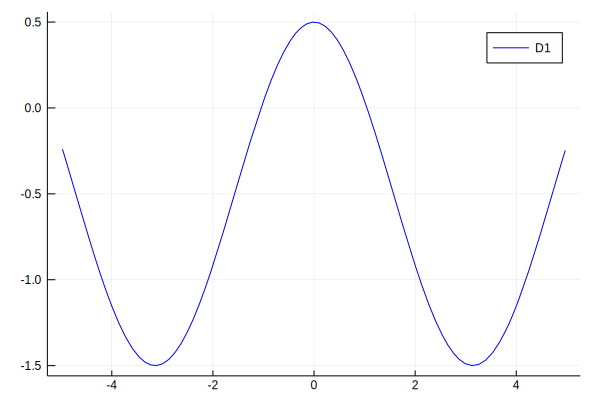

In [37]:
# Metoda Newtona

D1(f1) = x->ForwardDiff.derivative(f1, float(x))
plot(D1(f1), -5, 5, label = "D1", color = "blue")

In [38]:
x1 = find_zero((f1, D1(f1)), 0, Roots.Newton(), verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 0
* function evaluations: 1
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

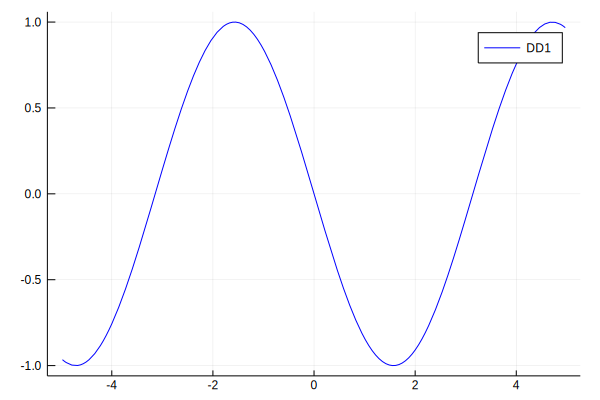

In [39]:
# Metoda Halleya

DD1(f1) = x->ForwardDiff.derivative(D1(f1), float(x))
plot(DD1(f1), -5, 5, label = "DD1", color = "blue")

In [40]:
x1 = find_zero((f1, D1(f1), DD1(f1)), 0.0, Roots.Halley(), verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Halley()
* iterations: 0
* function evaluations: 3
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [47]:
x1 = find_zero(f1, 0, Order1(),  verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Secant()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

In [48]:
x1 = find_zero(f1, 0, Order2(), verbose=true)
iszero(f1(x1))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Steffensen()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



true

<b> 3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym przykładzie, dla którego nie 
    działają (można na podstawie p.1 lub wymyślić własny)

In [30]:
x3 = find_zero(f3, (-5, 5), FalsePosition(), verbose=true)
iszero(f3(x3))

Results of univariate zero finding:

* Converged to: 2.2737367544323206e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 41
* function evaluations: 43
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  2.5000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.2500000000000000)
(a_3, b_3) = ( 0.0000000000000000,  0.6250000000000000)
(a_4, b_4) = ( 0.0000000000000000,  0.3125000000000000)
(a_5, b_5) = ( 0.0000000000000000,  0.1562500000000000)
(a_6, b_6) = ( 0.0000000000000000,  0.0781250000000000)
(a_7, b_7) = ( 0.0000000000000000,  0.0390625000000000)
(a_8, b_8) = ( 0.0000000000000000,  0.0195312500000000)
(a_9, b_9) = ( 0.0000000000000000,  0.0097656250000000)
(a_10, b_10) = ( 0.0000000000000000,  0.0048828125000000)
(a_11, b_11) = ( 0.0000000000000000,  0.0024414062500000)
(a_12, b_12) = ( 0.00000000000

false

In [31]:
x3 = find_zero(f3, (-5, 0), FalsePosition(), verbose=true)
iszero(f3(x3))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 0
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-5.0000000000000000,  0.0000000000000000)



true

Po zmianie przedziału z (-5, 5) na (-5, 0) zwraca poprawny wynik x3 = 0.0

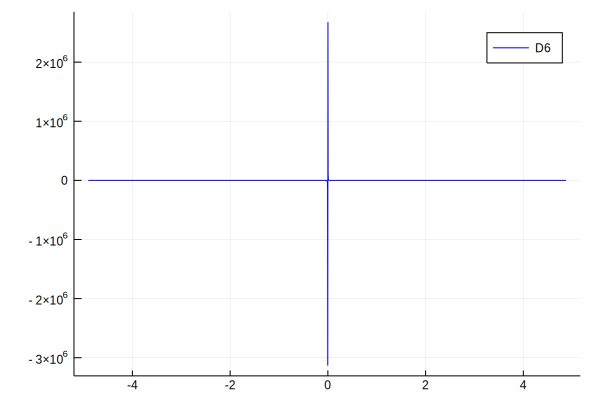

In [32]:
D6(f6) = x->ForwardDiff.derivative(f6, float(x))
plot(D6(f6), -5, 5, label = "D6", color = "blue")

In [33]:
x6 = find_zero((f6, D6(f6)), 0, Roots.Newton(), verbose=true)
iszero(f6(x6))

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Newton()

Trace:
x_0 =  0.0000000000000000,	 fx_0 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.0")

In [34]:
x6 = find_zero(f6, 0, Order1(),  verbose=true)
iszero(f6(x6))

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Secant()

Trace:
x_0 =  0.0000000000000000,	 fx_0 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.0")

<b> B. Namalowac <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki 
sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków.
    Sposób i język - dowolny.

In [ ]:
# Wstega Newtona - Python

import PIL
from PIL import Image

img_x = 512
img_y = 512
image = PIL.Image.new("RGB", (img_x, img_y))

# obszar rysowania
a_x = -1.0
b_x = 1.0
a_y = -1.0
b_y = 1.0

max_iteration_number = 20
# rozmiar kroku
h = 1e-5
# max dopuszczalny blad
max_epsilon = 1e-3


# funkcja generujca fraktal
def f(z): return (z * z * z) - 1   # (z * z * z) -( 2.0 * z) + 2.0


# rysowanie fraktala
for y in range(img_y):
    z_y = y * (b_y - a_y) / (img_y - 1) + a_y
    for x in range(img_x):
        z_x = x * (b_x - a_x) / (img_x - 1) + a_x
        z = complex(z_x, z_y)
        for i in range(max_iteration_number):
            #  pochodna
            dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
            #  iteracja Newtona
            z_0 = z - f(z) / dz
            #  kiedy blisko korzenia
            if abs(z_0 - z) < max_epsilon:
                break
            z = z_0
        image.putpixel((x, y), (i % 4 * 80, i % 6 * 50, i % 8 * 40))

image.save("newtonFractal.png", "PNG")